In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# source https://www.kaggle.com/datasets/adityakadiwal/water-potability

df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.isnull().mean().mul(100)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [8]:
df[df.isnull().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [9]:
(1265/3276)*100 # Shows data frame null values percentage(%) with at least one null value

38.614163614163616

## Exploratory Data Analysis

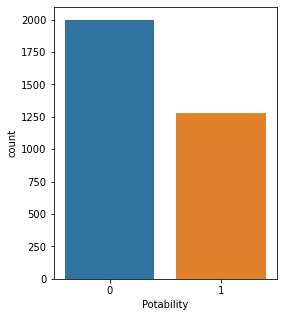

0    61.0%
1    39.0%
Name: Potability, dtype: object

In [10]:
# Potability

plt.figure(figsize=(4, 5))
sns.countplot(x=df['Potability'])

plt.show()

df['Potability'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

**61% of water is not good enough for drinking water.**

WHO standard for drinking water
- **pH Value**        : 6.5-8.5
- **Hardness**        : 
- **Solids**          : 500-1000 mg/L
- **Chloramines**     : < 4 mg/L 
- **Sulfate**         : 3-30 mg/L
- **Conductivity**    : 400 microSiemens/cm
- **Organic_carbon**  : < 2 mg/L
- **Trihalomethanes** : < 80 mg/L
- **Turbidity**       : 5 NTU

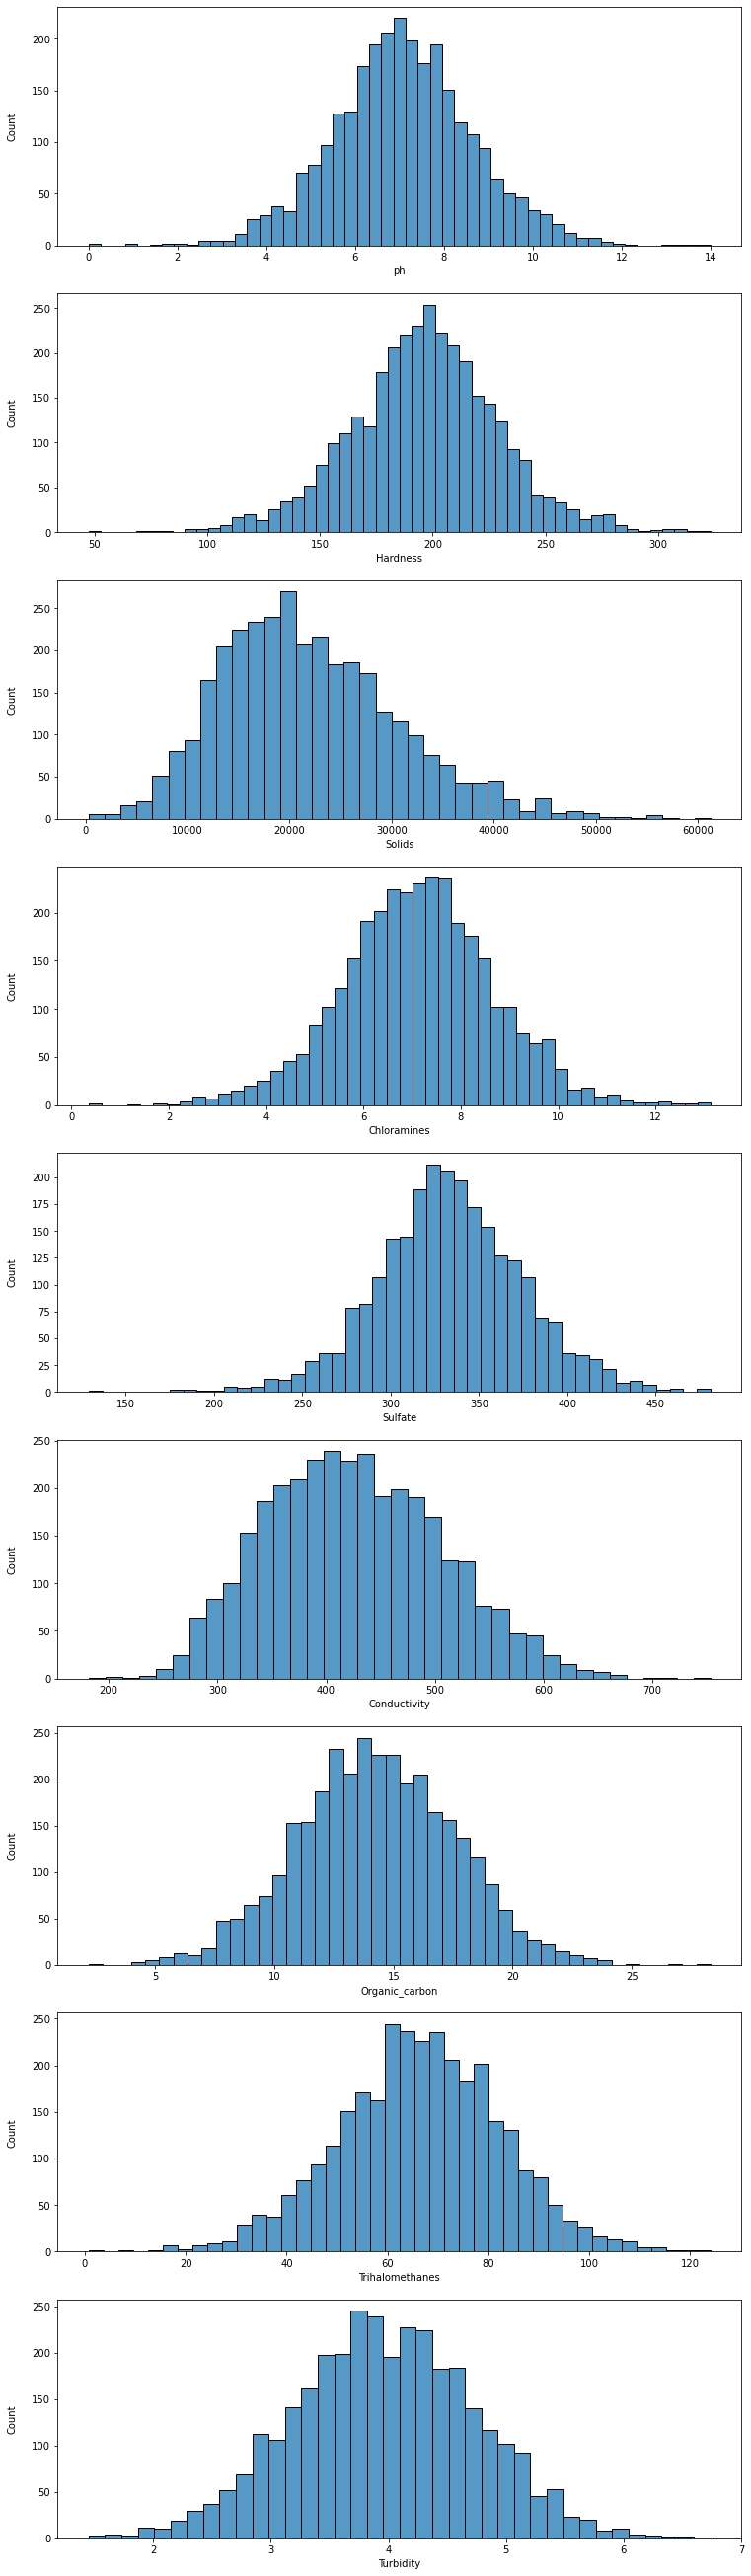

In [11]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(7, 15))
plt.subplots_adjust(right=1.5, top=2.5)

for i, feature in enumerate(features, 1):    
    plt.subplot(9, 1, i)
    sns.histplot(x=feature, data=df)
    
    plt.xlabel('{}'.format(feature), size=10)
    plt.ylabel('Count', size=10, labelpad=15)    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)

plt.show()

## Data Transformation

In [12]:
df_cleaned = df.copy()

In [13]:
df_cleaned.dropna(axis=0, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

In [14]:
pH_threshold = []

for i in df_cleaned.ph:
    if  6.5 <= i <= 8.5:
        pH_threshold.append(1)
    else:
        pH_threshold.append(0)

pH_threshold = pd.Series(pH_threshold, name = 'pH_potability')

In [15]:
hardness_threshold = []

for i in df_cleaned.Hardness:
    if  i >= 0:
        hardness_threshold.append(0)
    else:
        hardness_threshold.append(1)

hardness_threshold = pd.Series(hardness_threshold, name = 'Hardness_threshold')

In [16]:
solids_threshold = []

for i in df_cleaned.Solids:
    if  500 <= i <= 1000:
        solids_threshold.append(1)
    else:
        solids_threshold.append(0)

solids_threshold = pd.Series(solids_threshold, name = 'Solids_potability')

In [17]:
chloramines_threshold = []

for i in df_cleaned.Chloramines:
    if  i <= 4:
        chloramines_threshold.append(1)
    else:
        chloramines_threshold.append(0)

chloramines_threshold = pd.Series(chloramines_threshold, name = 'Chloramines_potability')

In [18]:
sulfate_threshold = []

for i in df_cleaned.Sulfate:
    if  3 <= i <= 30:
        sulfate_threshold.append(1)
    else:
        sulfate_threshold.append(0)

sulfate_threshold = pd.Series(sulfate_threshold, name = 'Sulfate_potability')

In [19]:
conductivity_threshold = []

for i in df_cleaned.Conductivity:
    if  i <= 400:
        conductivity_threshold.append(1)
    else:
        conductivity_threshold.append(0)

conductivity_threshold = pd.Series(conductivity_threshold, name = 'Conductivity_potability')

In [20]:
organic_carbon_threshold = []

for i in df_cleaned.Organic_carbon:
    if  i <= 400:
        organic_carbon_threshold.append(1)
    else:
        organic_carbon_threshold.append(0)

organic_carbon_threshold = pd.Series(organic_carbon_threshold, name = 'Organic_carbon_potability')

In [21]:
trihalomethanes_threshold = []

for i in df_cleaned.Trihalomethanes:
    if  i <= 80:
        trihalomethanes_threshold.append(1)
    else:
        trihalomethanes_threshold.append(0)

trihalomethanes_threshold = pd.Series(trihalomethanes_threshold, name = 'Trihalomethanes_potability')

In [22]:
turbidity_threshold = []

for i in df_cleaned.Turbidity:
    if  i <= 5:
        turbidity_threshold.append(1)
    else:
        turbidity_threshold.append(0)

turbidity_threshold = pd.Series(turbidity_threshold, name = 'Turbidity_potability')

In [23]:
df2 = pd.concat([df_cleaned, pH_threshold, hardness_threshold, solids_threshold, chloramines_threshold,
                 sulfate_threshold, conductivity_threshold, organic_carbon_threshold, trihalomethanes_threshold,
                turbidity_threshold], axis=1)

In [24]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,pH_potability,Hardness_threshold,Solids_potability,Chloramines_potability,Sulfate_potability,Conductivity_potability,Organic_carbon_potability,Trihalomethanes_potability,Turbidity_potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1,0,0,0,0,1,1,0,1
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,0,0,0,0,1,1,1,1
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,0,0,0,0,1,1,1,1
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,0,0,0,0,1,1,0,1
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1,0,0,0,0,0,1,1,1,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,1,0,0,0,0,1,1,1,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,0,0,0,0,0,0,1,1,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,0,0,0,0,0,0,1,1,1


## ML Model

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
df2.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'pH_potability', 'Hardness_threshold', 'Solids_potability',
       'Chloramines_potability', 'Sulfate_potability',
       'Conductivity_potability', 'Organic_carbon_potability',
       'Trihalomethanes_potability', 'Turbidity_potability'],
      dtype='object')

In [27]:
df2.drop(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
          'Organic_carbon', 'Trihalomethanes', 'Turbidity'], axis=1, inplace=True)

In [28]:
X = df2.drop('Potability', axis=1)
y = df2['Potability']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
# Initialize XGB
xgb = XGBClassifier(n_estimators=50, max_depth=6, random_state=1)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 60.63618290258449


In [31]:
# Initialize XGB
xgb = XGBClassifier(booster='gbtree', n_estimators=50, max_depth=6, learning_rate=0.1, random_state=2)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 60.437375745526836
